In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

file_path = '/content/drive/My Drive/Minor 5th Sem/embedded_gptneo.csv'
gpt_neo_embeddings = pd.read_csv(file_path)
print(gpt_neo_embeddings.head())


   annotator_id  platform  emotionaldistress  provokingviolence  \
0          3379         3                  2                  2   
1           488         0                  2                  2   
2          3275         0                  2                  1   
3          6801         0                  2                  0   
4         10615         0                  2                  2   

   individualharrassment                                          embedding  
0                      3  [0.004455165937542915, 0.33095115423202515, -0...  
1                      3  [0.8477875590324402, 1.9735788106918335, -1.19...  
2                      2  [0.011255793273448944, 1.4634126424789429, -0....  
3                      2  [-0.11528337001800537, 1.7641595602035522, -0....  
4                      3  [0.2188192456960678, 1.6596447229385376, -0.95...  


In [15]:
import pandas as pd

file_path = '/content/drive/My Drive/Minor 5th Sem/bert_embedded_dataset.csv'
bert_embeddings = pd.read_csv(file_path)
print(bert_embeddings.head())


   annotator_id                                      embedded_text  \
0          3379  [-0.2818194627761841, 0.3122991919517517, -0.0...   
1           488  [-0.4389492869377136, -0.4469502866268158, -0....   
2          3275  [0.07826860249042511, 0.41834571957588196, 0.2...   
3          6801  [0.21192581951618195, 0.4548655152320862, -0.0...   
4         10615  [-0.16936637461185455, 0.056792572140693665, 0...   

   emotionaldistress  provokingviolence  individualharrassment  
0                  2                  2                      3  
1                  2                  2                      3  
2                  2                  1                      2  
3                  2                  0                      2  
4                  2                  2                      3  


In [16]:
gpt_neo_embeddings['embedding'] = gpt_neo_embeddings['embedding'].apply(lambda x: eval(x))
bert_embeddings['embedded_text'] = bert_embeddings['embedded_text'].apply(lambda x: eval(x))

import torch
gpt_neo_tensor = torch.tensor(gpt_neo_embeddings['embedding'].tolist())
bert_tensor = torch.tensor(bert_embeddings['embedded_text'].tolist())

print(gpt_neo_tensor.shape, bert_tensor.shape)  # Check the shapes of tensors


torch.Size([54932, 768]) torch.Size([54932, 768])


In [17]:
import torch.nn as nn

dim_gpt_neo = gpt_neo_tensor.size(1)
dim_bert = bert_tensor.size(1)

common_dim = max(dim_gpt_neo, dim_bert)

linear_gpt_neo = nn.Linear(dim_gpt_neo, common_dim)
linear_bert = nn.Linear(dim_bert, common_dim)

projected_gpt_neo = linear_gpt_neo(gpt_neo_tensor)
projected_bert = linear_bert(bert_tensor)

print(projected_gpt_neo.shape, projected_bert.shape)  # Both should have the same shape now


torch.Size([54932, 768]) torch.Size([54932, 768])


In [18]:
# Concatenate GPT-Neo and BERT embeddings instead of averaging
concatenated_embeddings = torch.cat((projected_gpt_neo, projected_bert), dim=1)
print(concatenated_embeddings.shape)  # Should be [54932, 768 + 768] = [54932, 1536]


torch.Size([54932, 1536])


In [19]:
# Create a new embedding layer from the combined embeddings
new_embedding_layer = nn.Embedding.from_pretrained(concatenated_embeddings)

# Print the embedding layer to check
print(new_embedding_layer)

Embedding(54932, 1536)


In [20]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [21]:
import pandas as pd

# Original labels
y = gpt_neo_embeddings[['emotionaldistress', 'provokingviolence', 'individualharrassment']].values

# Convert y to binary format (multi-label)
y_binary = (y > 0).astype(int)

# Add binarized labels as new columns
gpt_neo_embeddings['emotionaldistress_binary'] = y_binary[:, 0]
gpt_neo_embeddings['provokingviolence_binary'] = y_binary[:, 1]
gpt_neo_embeddings['individualharrassment_binary'] = y_binary[:, 2]

# Save the updated dataframe to a new CSV file
output_path = '/content/drive/My Drive/Minor 5th Sem/updated_dataset_with_binary_labels.csv'
gpt_neo_embeddings.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")


Updated dataset saved to /content/drive/My Drive/Minor 5th Sem/updated_dataset_with_binary_labels.csv


In [24]:
gpt_neo_embeddings.head(100)

,annotator_id,platform,emotionaldistress,provokingviolence,individualharrassment,embedding,emotionaldistress_binary,provokingviolence_binary,individualharrassment_binary
0,3379,3,2,2,3,"[0.004455165937542915, 0.33095115423202515, -0...",1,1,1
1,488,0,2,2,3,"[0.8477875590324402, 1.9735788106918335, -1.19...",1,1,1
2,3275,0,2,1,2,"[0.011255793273448944, 1.4634126424789429, -0....",1,1,1
3,6801,0,2,0,2,"[-0.11528337001800537, 1.7641595602035522, -0....",1,0,1
4,10615,0,2,2,3,"[0.2188192456960678, 1.6596447229385376, -0.95...",1,1,1
...,...,...,...,...,...,...,...,...,...
95,9640,3,2,1,3,"[0.1726282835006714, 0.9376043677330017, -1.15...",1,1,1
96,10409,0,2,2,2,"[0.4967760443687439, 2.125267267227173, -0.808...",1,1,1
97,9273,2,2,2,2,"[0.7127152681350708, 0.8172300457954407, -0.89...",1,1,1
98,8495,0,2,2,2,"[-0.2925843298435211, 2.1565797328948975, -0.7...",1,1,1


In [26]:
X_train, X_val, y_train, y_val = train_test_split(concatenated_embeddings.detach().numpy(), y_binary, test_size=0.2, random_state=42)

# Custom Dataset class
class MultilabelDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.embeddings[idx], dtype=torch.float32),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float32)
        }

# DataLoaders
train_dataset = MultilabelDataset(X_train, y_train)
val_dataset = MultilabelDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [27]:
# Hybrid Model with CNN, BiLSTM, and Separate Attention Layers
class HybridCNNBiLSTMClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HybridCNNBiLSTMClassifier, self).__init__()

        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)

        # BiLSTM layer
        self.bilstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True, bidirectional=True)

        # Shared fully connected layer
        self.fc_shared = nn.Linear(128 * 2 * (input_dim // 2), 128)  # Adjusted for BiLSTM output

        # Separate attention and classification layers for each label
        self.attention_emotional = nn.Linear(128, 1)
        self.fc_emotional = nn.Linear(128, 1)

        self.attention_violence = nn.Linear(128, 1)
        self.fc_violence = nn.Linear(128, 1)

        self.attention_harassment = nn.Linear(128, 1)
        self.fc_harassment = nn.Linear(128, 1)

    def forward(self, x):
        # CNN
        x = x.unsqueeze(1)  # Add channel dimension for Conv1d
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)  # Shape: [batch_size, 256, input_dim / 2]

        # BiLSTM
        x = x.permute(0, 2, 1)  # Reshape for LSTM: [batch_size, seq_len, features]
        lstm_out, _ = self.bilstm(x)  # Shape: [batch_size, input_dim / 2, 256]

        # Flatten for fully connected layer
        x = lstm_out.contiguous().view(lstm_out.size(0), -1)
        shared_features = torch.relu(self.fc_shared(x))  # Shape: [batch_size, 128]

        # Emotional Distress Classification with Attention
        attn_weights_emotional = torch.softmax(self.attention_emotional(shared_features), dim=1)
        emotional_features = attn_weights_emotional * shared_features
        emotional_output = torch.sigmoid(self.fc_emotional(emotional_features))

        # Provoking Violence Classification with Attention
        attn_weights_violence = torch.softmax(self.attention_violence(shared_features), dim=1)
        violence_features = attn_weights_violence * shared_features
        violence_output = torch.sigmoid(self.fc_violence(violence_features))

        # Individual Harassment Classification with Attention
        attn_weights_harassment = torch.softmax(self.attention_harassment(shared_features), dim=1)
        harassment_features = attn_weights_harassment * shared_features
        harassment_output = torch.sigmoid(self.fc_harassment(harassment_features))

        # Concatenate outputs for multilabel classification
        return torch.cat((emotional_output, violence_output, harassment_output), dim=1)

In [30]:
# Instantiate model, loss function, optimizer
input_dim = concatenated_embeddings.size(1)  # Number of features in embeddings (1536 after concatenation)
output_dim = y_binary.shape[1]  # Number of labels

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = HybridCNNBiLSTMClassifier(input_dim=input_dim, output_dim=output_dim).to(device)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer)

Epoch 1/10, Loss: 0.1653
Epoch 2/10, Loss: 0.1536
Epoch 3/10, Loss: 0.1494
Epoch 4/10, Loss: 0.1461
Epoch 5/10, Loss: 0.1425
Epoch 6/10, Loss: 0.1381
Epoch 7/10, Loss: 0.1326
Epoch 8/10, Loss: 0.1266
Epoch 9/10, Loss: 0.1195
Epoch 10/10, Loss: 0.1131


In [31]:
# Evaluation function
def evaluate_model(model, val_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].cpu().numpy()

            outputs = model(input_ids).cpu().numpy()
            predictions.append(outputs)
            true_labels.append(labels)

    return np.vstack(predictions), np.vstack(true_labels)

# Evaluate the model
y_pred, y_true = evaluate_model(model, val_loader)

# Binarize predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred_binary, target_names=['Emotional Distress', 'Provoking Violence', 'Individual Harassment']))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred_binary)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

                       precision    recall  f1-score   support

   Emotional Distress       0.99      1.00      1.00     10887
   Provoking Violence       0.85      0.92      0.89      9012
Individual Harassment       0.99      1.00      1.00     10906

            micro avg       0.95      0.98      0.96     30805
            macro avg       0.95      0.97      0.96     30805
         weighted avg       0.95      0.98      0.96     30805
          samples avg       0.95      0.97      0.95     30805

Overall Accuracy: 0.8023


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


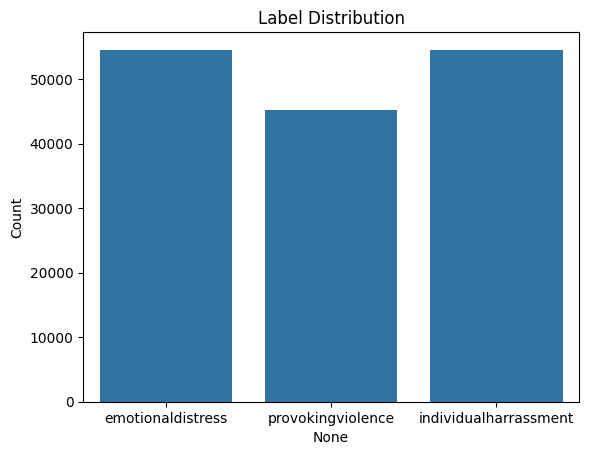

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot distribution for each label
label_counts = pd.DataFrame(y_binary, columns=['emotionaldistress', 'provokingviolence', 'individualharrassment']).sum()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.ylabel('Count')
plt.show()


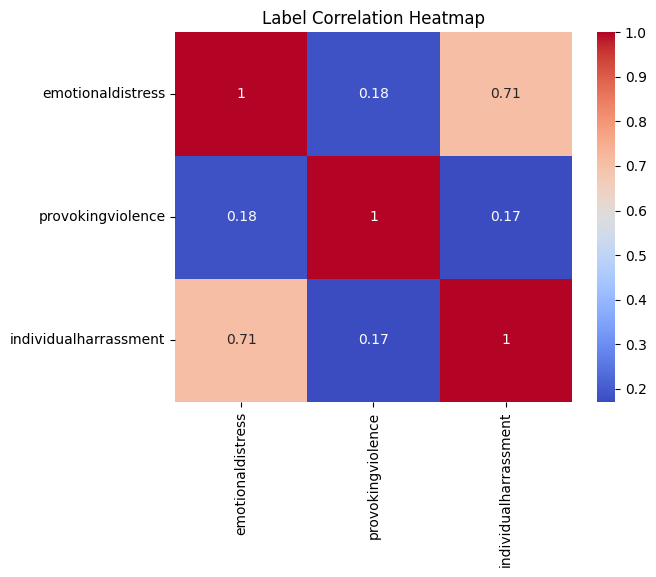

In [33]:
import seaborn as sns
import pandas as pd

# Convert y_binary to a DataFrame for easy manipulation
df_labels = pd.DataFrame(y_binary, columns=['emotionaldistress', 'provokingviolence', 'individualharrassment'])

# Calculate correlation matrix
corr_matrix = df_labels.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Label Correlation Heatmap')
plt.show()


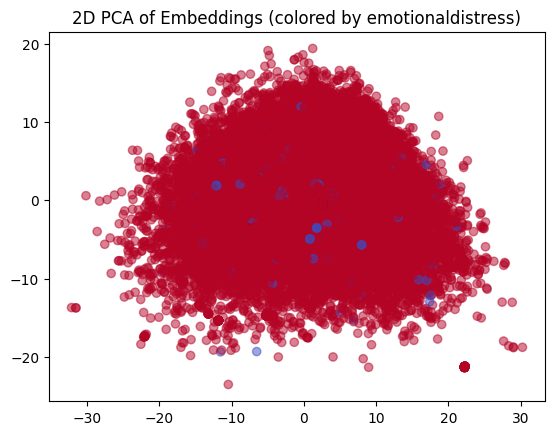

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(concatenated_embeddings.detach().numpy())

# Plot the 2D projection, coloring by one of the labels (e.g., emotionaldistress)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary[:, 0], cmap='coolwarm', alpha=0.5)
plt.title('2D PCA of Embeddings (colored by emotionaldistress)')
plt.show()


In [1]:
import torch

# Assuming `model` is your trained model and `X_val_tensor` is your validation set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    logits = model(X_val_tensor)  # Forward pass to get logits
    y_pred_proba = torch.sigmoid(logits).detach().numpy()  # Apply sigmoid and convert to numpy


NameError: name 'model' is not defined

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(y_true, y_pred_proba, label_names):
    plt.figure(figsize=(10, 7))
    for i in range(len(label_names)):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multilabel Classification')
    plt.legend(loc='lower right')
    plt.show()

# Assuming y_pred_proba contains predicted probabilities for each label
plot_roc_curves(y_val, y_pred_proba, ['emotionaldistress', 'provokingviolence', 'individualharrassment'])


NameError: name 'y_pred_proba' is not defined